<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In this notebook, we will extract English names of birds in Wingspan from pdf table and populate them into a table then translate into Chinese names in a csv file.

In [1]:
# !pip install tabula-py
# !pip install textract
# pip install googletrans
# pip install baidusearch
# pip install baike

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
from tabula import read_pdf

In [3]:
df = read_pdf('Downloads/bird-list-master-a4-20201018.pdf', pages=1)[0].iloc[:,0]
for i in range(2, 16):
    try:
        tmp = read_pdf('Downloads/bird-list-master-a4-20201018.pdf', pages=i)[0].iloc[:,0]
    except:
        print(i)
    df = df.append(tmp)

4


In [4]:
import PyPDF2

In [5]:
pdfFileObj = open('Downloads/bird-list-master-a4-20201018 4.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(0)
extra_birds = [s.split('\n')[0] for s in pageObj.extractText().split('.\n')][0:-1]

In [14]:
df.shape

(384,)

In [15]:
df.dropna().shape

(341,)

In [30]:
df = read_pdf('Downloads/bird-list-core-letter-20200529.pdf', pages="1")[0].iloc[:,0]
for i in range(2, 8):
    try:
        tmp = read_pdf('Downloads/bird-list-core-letter-20200529.pdf', pages=i)[0].iloc[:,0]
    except:
        print(i)
    df = df.append(tmp)

In [31]:
df.dropna().shape

(174,)

In [44]:
import re
pdfFileObj = open('Downloads/bird-list-core-letter-20200529.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(3)
extra_birds = [re.sub(r"(\w)([A-Z])", r"\1 \2", s.split('\n')[0]) for s in pageObj.extractText().split('.\n')][0:-1]

In [46]:
list(df.dropna()) + extra_birds

['Acorn Woodpecker',
 'American Avocet',
 'American Bittern',
 'American Coot',
 'American Crow',
 'American Goldfinch',
 'American Kestrel',
 'American Oystercatcher',
 'American Redstart',
 'American Robin',
 'American White Pelican',
 'American Woodcock',
 'Anhinga',
 'Anna’s Hummingbird',
 'Ash-Throated Flycatcher',
 'Atlantic Puffin',
 'Baird’s Sparrow',
 'Bald Eagle',
 'Baltimore Oriole',
 'Barn Owl',
 'Barn Swallow',
 'Barrow’s Goldeneye',
 'Bell’s Vireo',
 'Belted Kingfisher',
 'Bewick’s Wren',
 'Black Skimmer',
 'Black Tern',
 'Black Vulture',
 'Black-Bellied Whistling Duck',
 'Black-Billed Magpie',
 'Black-Chinned Hummingbird',
 'Black-Crowned Night-Heron',
 'Black-Necked Stilt',
 'Blue Grosbeak',
 'Blue Jay',
 'Blue-Gray Gnatcatcher',
 'Blue-Winged Warbler',
 'Bobolink',
 'Brant',
 'Brewer’s Blackbird',
 'Broad-Winged Hawk',
 'Bronzed Cowbird',
 'Brown Pelican',
 'Brown-Headed Cowbird',
 'Burrowing Owl',
 'Bushtit',
 'California Condor',
 'Canada Goose',
 'Canvasback',
 'Car

In [176]:
from googletrans import Translator

In [182]:
translator = Translator()

In [178]:
print(translator.translate('Acorn Woodpecker', dest='zh-cn').text)

橡子啄木鸟


In [183]:
def google_translate(s):
    return translator.translate(s, dest='zh-cn').text

In [273]:
import pandas as pd
pd_df = pd.DataFrame({"English_Name": list(df.dropna()) + extra_birds}).sort_values('English_Name')

In [181]:
pd_df.head()

,English_Name
0,Acorn Woodpecker
1,American Avocet
2,American Bittern
3,American Coot
4,American Crow


In [274]:
pd_df['Chinese_Name'] = pd_df['English_Name'].apply(lambda r: google_translate(r))

In [285]:
pd_df['Chinese_bird_Name'] = pd_df['English_Name'].apply(lambda r: google_translate(r.split()[1]) if len(r.split())>1 else google_translate(r.split()[0]))

In [198]:
pd_df.drop('Chinese_Bird_Name', i)

In [224]:
pd.set_option('display.max_rows', 200)

In [277]:
pd_df.iloc[37, 1] = "長刺歌雀, 食米鸟"

In [280]:
pd_df.iloc[38, 2] = "黑雁"

In [287]:
pd_df.iloc[41, 3] = "古铜色牛鹂"

In [281]:
pd_df.iloc[55, 3] = "板栗领淫"

In [282]:
pd_df.iloc[57, 1] = "北美洲燕子"

In [290]:
pd_df.iloc[60, 3] = "北美星鸦"

In [292]:
pd_df.iloc[69, 1] = "黑喉麻雀， 美洲雀"

In [298]:
pd_df = pd_df.reset_index().drop('index', axis =1)

In [300]:
pd_df.iloc[141, 1] = "彩鸲莺"

In [312]:
pd_df.iloc[145, 1] = "松树黄雀"

In [317]:
pd_df.iloc[148, 3] = "紫崖燕"

In [319]:
pd_df.iloc[154, 1] = "紅眼綠鵑"

In [321]:
pd_df.iloc[159, 3] = "环嘴鸥"

In [323]:
pd_df.iloc[167, 3] = "萨伊菲比在霸鹟家庭雀形目鸟类"

In [325]:
pd_df.iloc[169, 1] = "叉尾霸鹟"

In [327]:
pd_df.iloc[187, 1] = "白面朱鹭"

In [329]:
pd_df.iloc[192, 3] = "扇尾沙锥"

In [331]:
pd_df.iloc[192, 3] = "黄胸巨(即鸟)莺"

In [332]:
pd_df

,English_Name,Chinese_Name,Chinese_Name_Baidu,Chinese_Name_wiki,Chinese_bird_Name
0,Acorn Woodpecker,橡子啄木鸟,橡树啄木鸟,Acorn Woodpecker,啄木鸟
1,American Avocet,美国长嘴鳄,American Avocet,American Avocet,长嘴鳄
2,American Bittern,美国卤汁,美洲麻鳽,American Bittern,卤水
3,American Coot,美国老傻瓜,美洲骨顶,American Coot,笨人
4,American Crow,美国乌鸦,American Crow,短嘴鸦,Crow
5,American Goldfinch,美国金翅雀,American Goldfinch,美洲金翅雀,金翅雀
6,American Kestrel,美国红est,American Kestrel,美国隼,红est
7,American Oystercatcher,美国蛎cat,美洲蛎鹬,American Oystercatcher,牡蛎捕手
8,American Redstart,美国红启动,橙尾鸲莺,American Redstart,重新启动
9,American Robin,美国罗宾,北美知更鸟,旅鶇,罗宾


In [333]:
pd_df.to_csv('wingspan_bird_list_translation.csv', index= False)

In [262]:
baike_crawler("Brant bird")

'黑雁'

In [226]:
baike_crawler("American Bittern")

'美洲麻鳽'

In [227]:
baike_crawler("American Coot")

'美洲骨顶'

In [249]:
print_langlinks("American Kestrel")

'美国隼'

In [314]:
print_langlinks("Purple martin")

'Purple martin'

In [250]:
baike_crawler("American Oystercatcher")

'美洲蛎鹬'

In [251]:
baike_crawler("American Redstart")

'橙尾鸲莺'

In [70]:
from bs4 import BeautifulSoup
import requests
from urllib.parse import quote

In [192]:
query = "American Avocet 中文"
url = 'https://www.google.com/search?q=%s' % quote(query)
response = requests.get(url)

In [193]:
soup = BeautifulSoup(response.text)

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>American Avocet 中文 - Google Search</title><script nonce="19thd6wQ7TSXS+36YUvelA==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.goo
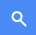
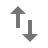
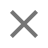

In [194]:
from pprint import pprint
pprint(soup)

<div id="main">
 <div>
  <div class="KP7LCb">
   <div class="bRsWnc">
    <div class="N6RWV">
     <div class="Pg70bf Uv67qb">
      <span class="OXXup">
       All
      </span>
      <a class="eZt8xd" href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=isch&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICCgB">
       Images
      </a>
      <a class="eZt8xd" href="https://maps.google.com/maps?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;um=1&amp;ie=UTF-8&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICSgC">
       Maps
      </a>
      <a class="eZt8xd" href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=nws&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICigD">
       News
      </a>
      <a href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=vid&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICygE">
       Videos
      </a>
      <a href="/search?q=Amer
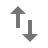
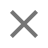

In [195]:
print(soup.find('div', id='main').prettify())

['<div id="main"><div><div class="KP7LCb"> <div class="bRsWnc"> <div class="N6RWV"> <div class="Pg70bf Uv67qb"> <span class="OXXup">All</span><a class="eZt8xd" href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=isch&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICCgB">Images</a><a class="eZt8xd" href="https://maps.google.com/maps?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;um=1&amp;ie=UTF-8&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICSgC">Maps</a><a class="eZt8xd" href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=nws&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICigD">News</a> <a href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=vid&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUICygE">Videos</a> <a href="/search?q=American+Avocet+%E4%B8%AD%E6%96%87&amp;ie=UTF-8&amp;source=lnms&amp;tbm=shop&amp;sa=X&amp;ved=0ahUKEwiG1_-Z-YXtAhXQA2MBHXtTAB8Q_AUIDC
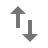
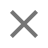

In [196]:
str(soup.find('div', id='main')).split('American avocet')

In [252]:
def baike_crawler(s):
    query = f"{s} 中文"
    url = 'https://www.google.com/search?q=%s' % quote(query)
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    baike_name = None
    try:    
        baike_name = str(soup.find('div', id='main')).split('_百度百科')[0][-20:].split('">')[1]
    except: 
        return s
    if baike_name:
        return baike_name
    else:
        return None

In [275]:
pd_df['Chinese_Name_Baidu'] = pd_df['English_Name'].apply(lambda r: baike_crawler(r))

In [276]:
pd_df['Chinese_Name_wiki'] = pd_df['English_Name'].apply(lambda r: print_langlinks(r))

In [205]:
pip install translators

     |████████████████████████████████| 57 kB 1.3 MB/s eta 0:00:01
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-py3-none-any.whl size=14588 sha256=b08dfbd6f16d895af2ff6ff78831fed0314c68e8e1ff48219eb9a4e4a3c3a375
  Stored in directory: /Users/hluan/Library/Caches/pip/wheels/9a/ee/03/da5c0b4a8c13362beeb844eb913bbe58a89bde1de2b9157007
Successfully built PyExecJS
Note: you may need to restart the kernel to use updated packages.


In [206]:
import translators as ts

Using United States server backend.


In [222]:
ts.google('American Bittern wings', to_language='zh')

'鸟美国苦汁的翅膀'

In [230]:
pip install wikipedia-api

  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-py3-none-any.whl size=13462 sha256=acbb97c7a7d3bdaf24810c146aa8684adce6a3274c122185c8f3d1677e015fb5
  Stored in directory: /Users/hluan/Library/Caches/pip/wheels/d3/24/56/58ba93cf78be162451144e7a9889603f437976ef1ae7013d04
Successfully built wikipedia-api
Note: you may need to restart the kernel to use updated packages.


In [231]:
import wikipediaapi

In [242]:
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia('en')

page_py = wiki_wiki.page('American kestrel')

In [243]:
page_py.exists()

True

In [256]:
def print_langlinks(s):
    wiki_wiki = wikipediaapi.Wikipedia('en')
    page = wiki_wiki.page(s)
    if page.exists():
        langlinks = page.langlinks
        if langlinks:
            for k in sorted(langlinks.keys()):
                v = langlinks[k]
            if v.language == 'zh':
                return v.title
            else:
                return s
    else:
        return s

print_langlinks('American kestrel')

'美国隼'